In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
from matplotlib import pyplot as plt

Using Theano backend.


In [2]:
path = get_file('nietzsche.txt', origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('corpus length:', len(text))

606208/600901 [==============================] - 1s 2us/step
corpus length: 600893


In [3]:
chars = sorted(list(set(text)))
print('total chars:', len(chars))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 57


In [45]:
from nltk.tokenize import sent_tokenize
# sent = sent_tokenize(text)
sent = text.split('\n')
print(len(sent))

9935


In [46]:
lengths = []

for s in sent:
    lengths.append(len(s))

In [47]:
uniq, nums = np.unique(np.array(lengths), return_counts=True)
# print(uniq)

# uniq, nums = np.unique([1,2,1,3,4,2,3,4], return_counts=True)

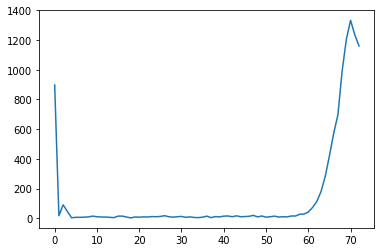

In [48]:
plt.plot(nums)
plt.show()

In [9]:
maxlen = 50
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

nb sequences: 200281


In [10]:
len(sentences)

200281

In [11]:
print('Vectorization...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Vectorization...


In [13]:
print (indices_char[np.argmax(X[0][1])])
# print y[0]

r


In [14]:
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

model.summary()

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               95232     
_________________________________________________________________
dense_1 (Dense)              (None, 57)                7353      
_________________________________________________________________
activation_1 (Activation)    (None, 57)                0         
Total params: 102,585
Trainable params: 102,585
Non-trainable params: 0
_________________________________________________________________


In [43]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    print("Smoothened: ", preds)
    probas = np.random.multinomial(1, preds, 1)
    print(probas)
#     return preds
    return np.argmax(probas)

Smoothened:  [0.1963078  0.08253726 0.46690127 0.13701375 0.03470264 0.08253726]
[[0 0 1 0 0 0]]
[0.2  0.1  0.4  0.15 0.05 0.1 ]
[0.1963078  0.08253726 0.46690127 0.13701375 0.03470264 0.08253726]


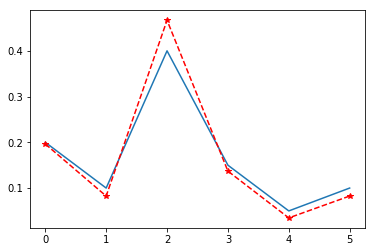

In [42]:
prob = np.array([0.2, 0.1, 0.4, 0.15, 0.05, 0.1])

a = sample(prob, temperature=0.8)

print (prob)
print (a)

plt.plot(prob)
plt.plot(a, 'r--*')

In [25]:
for iteration in range(1, 10):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X, y, shuffle=True,
              batch_size=128,
              epochs=1, verbose=2)

    start_index = random.randint(0, len(text) - maxlen - 1)

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


--------------------------------------------------
Iteration 1
Epoch 1/1
 - 275s - loss: 1.9552 - acc: 0.4286

----- diversity: 0.2
----- Generating with seed: "e creation. there still apparently
remains that di"
e creation. there still apparently
remains that different of the sense of the instinct to the sense of the proble to the present of the formerally and the truth of the sense of the proces the sense to the former of the sense of the free the sense of the process of the contertion of the conditions and and and and and and the were of the sense of the sense of the sense of the proces the sense of the present of the conditions and and and a for the s

----- diversity: 0.5
----- Generating with seed: "e creation. there still apparently
remains that di"
e creation. there still apparently
remains that differently who is the traching espected to the sentertity in the becourses of the sense of the pressives for the fature for the sciences for the sense to the sense of the pression of 

always makes him "come of the moment and saint--hear that a the saining and same for the species, of a serious in excess that the cause of the maning that the morality of the same in the world and the mastered in our same man and the will only an interceation of the great processes and like, in every which is a personal the problems of the expression of the one and man of the order of order are the world the will on tha

----- diversity: 1.0
----- Generating with seed: "mself--but whose curiosity
always makes him "come "
mself--but whose curiosity
always makes him "come of a more and expression is the attemat furrtion. so the work nogationne with even without
anoud, whenher have very confidence are too
where these no longers insertion are clarrchorap, may wele concelling the arpined noble iffection a conidediunquitation of be about at theirs corruct man.

resught, that a mo men the sceasing--chrietiin, the,
for the mrribe by bo again (the jufges: they are the con

----- diversity: 1.2


ancorts is or even our ocnast)
robority to go "fixhame. he resdened, sile indoes actions. al lease me of prisonally
own byime
belongs will after he roust no few into
sucpess
ghancess "utptroms,
you, maintipest know magils, i"ness. they eccophed. formersomerury
and which go the obsgr
wlauston appene?
probly a desires whated certain standpicate

--------------------------------------------------
Iteration 8
Epoch 1/1
 - 294s - loss: 1.4024 - acc: 0.5770

----- diversity: 0.2
----- Generating with seed: "ful in questioning and
well worth questioning, but"
ful in questioning and
well worth questioning, but the individual to the problems of the world and the present of the problems of the same of the problems of the spirituality, of the saint of the formerly the same of the fature of the other that the fact the present and the conditional to the world of the fathing the problems of man of the origin of the intellectual man in the same of the conditional man of the world of the world and the